In [1]:
# we'll use "movies.csv" and "ratings.csv" 

import numpy as np
import pandas as pd

ratings_data = pd.read_csv('C:\\Users\\faisa\\Downloads\\Jupyter Notebook\\Movie recommender\\ml-latest-small\\ratings.csv')
ratings_data.head() # head() method diye amader dataset er 1st 5ta row dekhbo

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
# amader movie name nai, ratings dataset e...tai movie csv import kortesi

movie_names = pd.read_csv("C:\\Users\\faisa\\Downloads\\Jupyter Notebook\\Movie recommender\\ml-latest-small\\movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# we want to get movieid, movie name, rating, genres, userid in a single dataframe...thats why we're merging

movie_data = pd.merge(ratings_data, movie_names, on='movieId') #jehetu 2ta tei movieid column ase, amra 1ta kore feltesi
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
# Using the describe or info commands we can get a brief description of our dataset.

movie_data.describe() # we can get insights from our dataset

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
# lets look at the average rating of each movie
# To do so, we can group the dataset by the 'title of the movie' and then 'calculate the mean of the rating' for each movie

movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [7]:
# we can see our output isn't sorted...lets sort it in descending order

movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [8]:
# this list is somehow misleading coz a movie can be in top position if 1 user gave it 5 star
# but a movie which is really a good one gets a "higher rating by a large number of users".
# lets now plot total number of ratings for a movie

movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
# Now we know that Both the "average rating per movie" and the "number of ratings per movie" are Important attributes
# Let's create a new dataframe that contains both of these attributes.


In [10]:
# first add the average rating of each movie to this dataframe

ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [11]:
# Next, we need to add the "number of ratings for a movie" to the ratings_mean_count dataframe
# adding "ratings_count" to the dataframe

ratings_mean_count['ratings_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [12]:
# lets look at our dataframe

ratings_mean_count.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


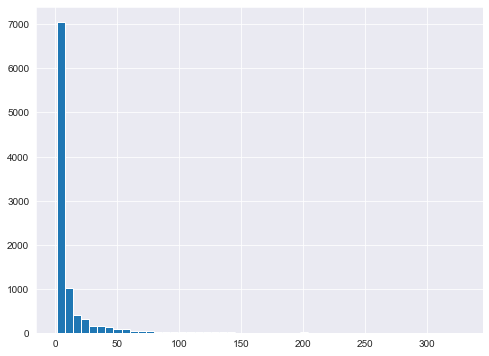

In [13]:
# Let's plot a histogram for the "number of ratings" represented by the "rating_counts" column

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['ratings_count'].hist(bins=50)


### From the output, you can see that most of the movies have received less than 50 ratings. While the number of movies having more than 100 ratings is very low.

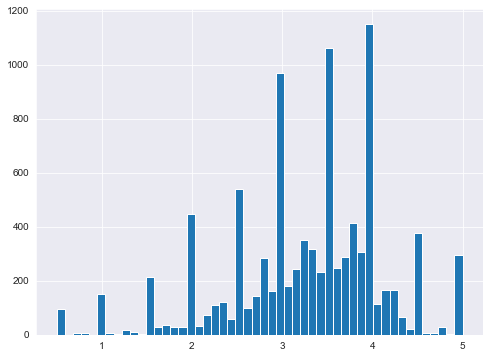

In [15]:
# Now we'll plot a histogram for "average ratings"

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

In [16]:
# You can see that the integer values have taller bars than the floating values since most of 
# the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. 
# Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. 
# There are a few outliers in the data.

### Earlier, we said that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. 

<Figure size 576x432 with 0 Axes>

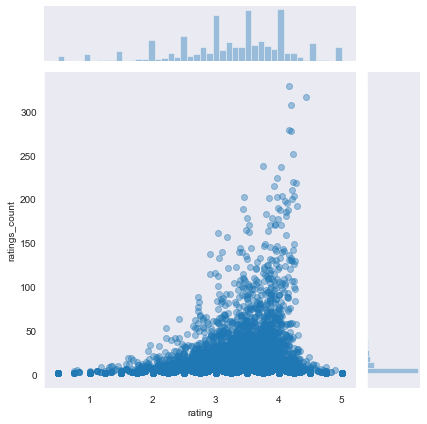

In [20]:
# We will plot "average ratings" against the "number of ratings"

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='ratings_count', data=ratings_mean_count, alpha=0.4)

In [21]:
# The graph shows that, in general, movies with higher average ratings actually have more number of ratings, 
# compared with movies that have lower average ratings.

## Finding Similarities Between Movies

In [22]:
# We will use the correlation between the ratings of a movie as the similarity metric.
# To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name 
# and each row contains the rating assigned by a specific user to that movie. 
# Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

In [24]:
# creating a matrix of "movie titles" and corresponding "user ratings"

user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Each column contains all the user ratings for a particular movie
# lets find all the user ratings of "forest gump"

forrest_gump_rating = user_movie_rating['Forrest Gump (1994)']
forrest_gump_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [26]:
# let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between 
# the user ratings for the "Forest Gump (1994)" and all the other movies using "corrwith()" function
# Corrwith computes the pairwise correlation of rows or columns of two dataframe objects.

In [28]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_rating)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

C:\Users\faisa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\faisa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [29]:
# In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with 
# their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and 
# correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head() fn.

In [30]:
# Let's sort the movies in descending order of correlation to see highly correlated movies at the top

corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


### From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" and only one other movie and rated both of them as 5.

In [31]:
# A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. 
# To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe.

In [32]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['ratings_count'])
corr_forrest_gump.head()

,Correlation,ratings_count
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [35]:
# Let's now filter movies correlated to "Forest Gump (1994)", that have more than 50 ratings.

corr_forrest_gump[corr_forrest_gump ['ratings_count']>50].sort_values('Correlation', ascending=False).head(10)

,Correlation,ratings_count
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53


### Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)". The movies in the list are some of the most famous movies Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.